## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
color_palette=sns.color_palette
plt.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
!pip install xgboost

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head(3)

## data preprocessing

In [3]:
#check missing values
data.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
#check duplicates
data.duplicated().sum()

0

In [5]:
data.dtypes

Id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
data2=data.copy()

In [7]:
encoder=LabelEncoder()


In [8]:
data2['cut']=encoder.fit_transform(data2['cut'])
data2['color']=encoder.fit_transform(data2['color'])
data2['clarity']=encoder.fit_transform(data2['clarity'])

In [9]:
data2

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,2,1,5,61.5,56.0,1760,5.16,5.18,3.18
43148,43149,0.72,4,0,5,62.1,59.0,3016,5.70,5.73,3.55
43149,43150,0.44,3,5,6,61.5,58.0,990,4.95,4.87,3.02
43150,43151,0.31,3,1,4,60.2,58.0,734,4.38,4.43,2.65


## Split data

In [10]:
X=data2.drop(['Id','price'],axis=1)
y=data2['price']

X

## Split Features and Target

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
x_train.shape,x_test.shape

((34521, 9), (8631, 9))

## Model Building & Validation

In [13]:
models={'Linear regression':LinearRegression(),'Random forest':RandomForestRegressor(),'XGboost':XGBRegressor()}
kf=KFold(n_splits=6,shuffle=True,random_state=21)

In [14]:
for name,model in models.items():
    cross_scores = cross_val_score(model,x_train,y_train,cv=kf,scoring='neg_mean_squared_error')
    rmse=np.sqrt(-cross_scores)
    print(f'{name}')
    print(f'scores:{rmse}')
    print(f'mean score:{np.mean(rmse)}')
    print(f'std score:{np.std(rmse)}')
    print('*'*10)


Linear regression
scores:[1366.55418201 1336.80125652 1411.64077361 1368.29667521 1351.60909155
 1350.08433025]
mean score:1364.1643848604187
std score:23.73962427128133
**********
Random forest
scores:[558.84028903 547.91237095 580.60699021 633.45497176 555.40737744
 558.08171948]
mean score:572.3839531439098
std score:29.07557633903721
**********
XGboost
scores:[533.09640995 538.53640731 584.29337853 601.81922794 548.88400255
 563.74602041]
mean score:561.7292411166558
std score:24.641298173629128
**********


## Fine tune hyperparamters

In [15]:
model=XGBRegressor()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],   #(528.9905435926516, 413.0295749427162)test,train
    'max_depth': [3, 4, 5,7],            #cv=6
    'n_estimators': [30, 50, 100]
}



In [16]:
grid=GridSearchCV(model,param_grid,cv=kf)
grid.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=21, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 7],
                         'n_estimators': [30, 50, 100]})

In [17]:
best_model=grid.best_estimator_
y_pred=best_model.predict(x_test)
y_pred1=best_model.predict(x_train)
np.sqrt(mean_squared_error(y_test,y_pred)),np.sqrt(mean_squared_error(y_train,y_pred1))

(528.9905435926516, 413.0295749427162)

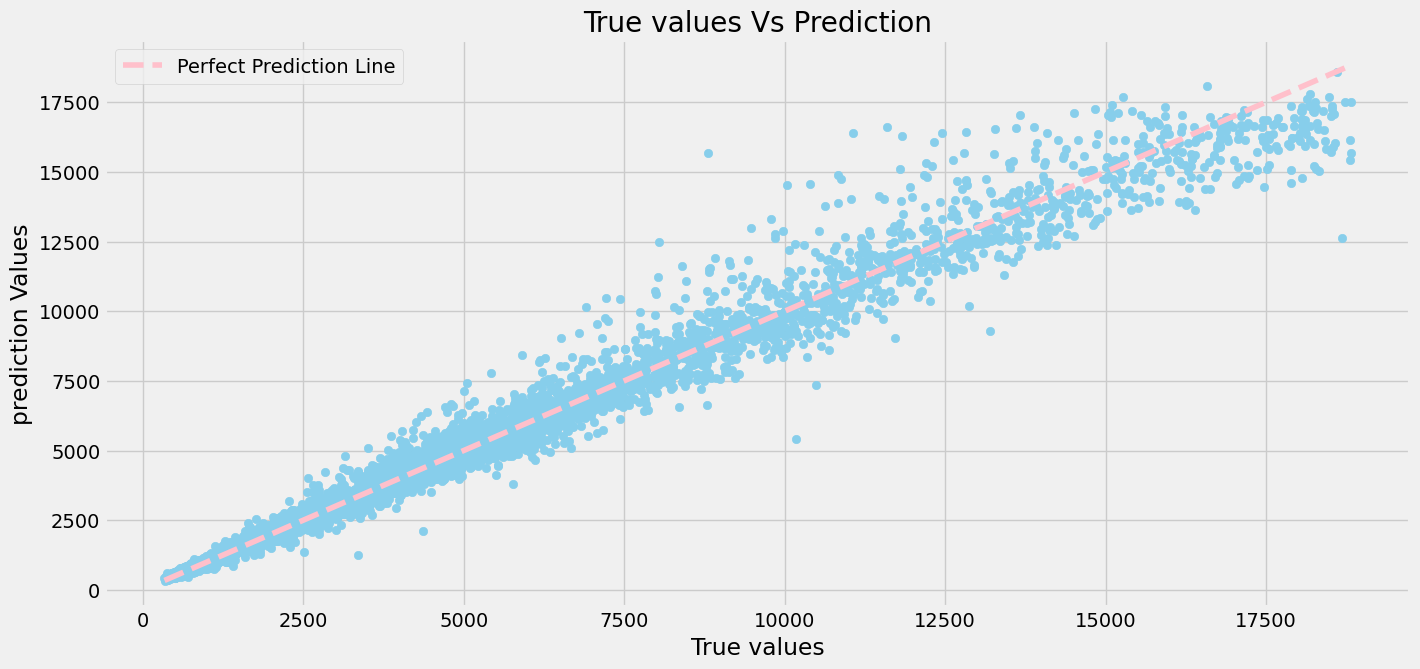

In [18]:
plt.figure(figsize=(15, 7))
plt.title('True values Vs Prediction')
plt.scatter(y_test, y_pred,c='skyblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='pink' ,label='Perfect Prediction Line',linestyle='--')
plt.xlabel('True values')
plt.ylabel('prediction Values')
plt.legend(loc='upper left')
plt.show()

## Evaluation

In [19]:
test_data=pd.read_csv('/kaggle/input/diamond-price-prediciton-2024/test.csv')

In [20]:
test_data['cut']=encoder.fit_transform(test_data['cut'])
test_data['color']=encoder.fit_transform(test_data['color'])
test_data['clarity']=encoder.fit_transform(test_data['clarity'])

In [21]:
test_data

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,2,3,7,61.1,57.0,4.52,4.48,2.75
1,2,0.71,3,1,5,62.7,58.0,5.74,5.68,3.58
2,3,0.44,4,5,4,62.8,56.0,4.83,4.88,3.05
3,4,0.81,3,1,3,60.1,59.0,6.09,6.03,3.65
4,5,0.40,2,3,6,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,2,4,4,60.9,56.0,5.34,5.36,3.26
10784,10785,1.05,2,3,5,60.8,57.0,6.65,6.58,4.02
10785,10786,0.71,2,1,6,62.3,55.0,5.68,5.72,3.55
10786,10787,1.11,3,1,3,61.0,60.0,6.68,6.66,4.07


In [22]:
test_data

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,2,3,7,61.1,57.0,4.52,4.48,2.75
1,2,0.71,3,1,5,62.7,58.0,5.74,5.68,3.58
2,3,0.44,4,5,4,62.8,56.0,4.83,4.88,3.05
3,4,0.81,3,1,3,60.1,59.0,6.09,6.03,3.65
4,5,0.40,2,3,6,61.2,56.0,4.74,4.80,2.92
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,2,4,4,60.9,56.0,5.34,5.36,3.26
10784,10785,1.05,2,3,5,60.8,57.0,6.65,6.58,4.02
10785,10786,0.71,2,1,6,62.3,55.0,5.68,5.72,3.55
10786,10787,1.11,3,1,3,61.0,60.0,6.68,6.66,4.07


## Submit the solution

In [23]:
sub=pd.DataFrame()
price=best_model.predict(test_data.drop('Id',axis=1))
sub['Id']=test_data['Id']
sub['price']=price

In [24]:
sub.to_csv('D:\MLdatasets\Submission.csv',index=None)

## Save Model

In [25]:
import pickle

In [26]:
with open('XGregressor.sav','wb') as f:
      pickle.dump(best_model,f)